# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine learning is certainly an appropriate solution for this problem. Looking at the information of all flights available for each month, it is clear to note that there is a lot of information available with 1.5 GB of flight information across several years (2014 to 2018). There are several variables about each flight for many airlines across the entire nation (USA).  
Flight delays are influenced by many variables including, gate and runway congestion, air traffic, maintenance and weather. These will vary from airport to airport. The busiest airports such as Chicago O'Hare and Atlanta may have more flight delays due to congestion and airports in the north of the country may have more flight delays of cancellations due to weather conditions such as snow.
The objective of this problem is to predict if a flight will be delayed by 15 minutes or more. Machine learning is well suited to predicting this for the reasons described above. A lot of data across the entire nation and a lot of detailed information about the flights (features or variables) ensure that machine learning can be applied to this problem.

### 2. Formulate the business problem, success metrics, and desired ML output.

**Business Problem**  
Stakeholders in the airline industry can identify where and when the most delays take place by applying machine learning to predict the delays based on the historical data. Knowing where and when the delays take places, the airports and airlines can investigate further what causes these delays and can focus in these areas to improve their processes and methods to improve flight delays in these areas. This will be a better outcome for their customers (passengers and freight companies) which will ultimately help in retaining their customer base or increasing it with better service. This will of course improve their profitability.

**Success Metrics**  
Several KPIs (Key Performance Indicators) can be used to measure the success of the modelling. These include:  

<u>**Prediction Accuracy:**</u> Accurately predicting whether a flight will be delayed or not will be a key indicator. Not only the overall accuracy, but also high precision and recall.  

<u>**Actual Reduction of Delays:**</u> Determining where and when delays take place is the first step and addressing the delays. To improve the amount of or the length of the delays is the next step, and this is by no means an easy task. There are many factors that contribute to a delay and resolving some may be relatively simple by rescheduling flights to another time of day and others may be more complex and expensive such as terminal gate or airport capacity expansion. Ultimately the reduction of number of delays is what this business problem is trying to address so this will be the true success metric.  

<u>**Customer Satisfaction and increased revenue:**</u> Once the issues flight delays have been addressed, ultimately customer satisfaction must be measured to see if there has been an increase of satisfied customers with the new changes. Also increased revenue due to more customers or decreased operational costs will be another important indicator of the success of this project.  

**Desired Machine Learning Output**  
The desired ML output will be similar to the first success metric, which is accurately being able to predict when and where and on which flights there are likely to be delays. This is a binary classification task, but it could also be adapted to show the probability of a delay of 15 minutes or more.

### 3. Identify the type of ML problem you’re dealing with.

This project will be predicting if there is a flight delay of 15 minutes or longer or no delay. This is a binary classification utilising supervised learning. The data will be split into a training and test set and the model. The training set will be used to train and fit the model and the test set is used as an independent set of data to predict the accuracy of the model's performance.  
It is important to not only achieve high overall accuracy, but also being able to accurately predict the minority class, in this case 'flight delay'. Precision, recall and the F1-score are also important indicators to ensure the model is performing well.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
# from pathlib2 import Path # This line was causing issues in my envrionment.
from pathlib import Path # I have run this line instead.
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

In [2]:
# Display the current working directory to ensure it is correct
os.getcwd()

'C:\\Users\\alang\\DSTS\\Ast 2'

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [3]:
# download the files

# <note: make them all relative, absolute path is not accepted>
base_path = Path('.') # The current directory
zip_path = base_path / 'zipped_flight_data' 
base_path / 'zipped_flight_data'
csv_base_path = base_path / 'flight_data'

# Create the directories if they don't exist yet
os.makedirs(zip_path, exist_ok=True)
os.makedirs(csv_base_path, exist_ok=True)

In [4]:
# How many zip files do we have? write a code to answer it.

# Check all the files in the 'zip_files' directory. If they end with '.zip',
# which the should do, then add them to the zip_file_list

# Create an empty list
zip_files = []

# Go through each file in the directory
for file in zip_path.iterdir():
    # Check if it is a '.zip' file
    if file.suffix == '.zip':
        # If so, add it to the list
        zip_files.append(file)

# The length of this list will contain the total number of zip files
number_of_zip_files = len(zip_files)

print(f'The total number of zip files is: {number_of_zip_files}')


The total number of zip files is: 60


#### Extract CSV files from ZIP files

In [5]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

In [6]:
for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting zipped_flight_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present

In [7]:
# How many csv files have we extracted? write a code to answer it.

# Create a list to store the names of the CSV files
csv_files = []

# Go through all the files in the directory
for file in csv_base_path.iterdir():
    # Check if the file is a .CSV file
    if file.suffix == '.csv':
        # If so, add the file name to the list
        csv_files.append(file)

# Count the number of CSV files
number_of_csv_files = len(csv_files)

# Print the result
print(f'The total number of CSV files is: {number_of_csv_files}')

The total number of CSV files is: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [8]:
# I could not get IFrame working so I tried a different way of viewing the HTML file still using IPython
#from IPython.display import IFrame
# IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

# Read the html file path into a variable
html_file_path = f'{csv_base_path}/readme.html'

# Import the required library
from IPython.core.display import HTML

# Open the HTML file before reading it
html_file = open(html_file_path, 'r')

# Read ther HTML file into a string
html_file_content = html_file.read()

# Close the file to free up resources
html_file.close()

# Align the content to the left of the cell.
html_content = """
<style>
  * {
    text-align: left !important;
  }
</style>
""" + html_file_content

# Display the HTML content
display(HTML(html_content))

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [9]:
# Set the display to show all columns in a pd dataframe
pd.set_option('display.max_columns', None)

In [10]:
df_temp = pd.read_csv(csv_files[0]) # **ENTER YOUR CODE HERE**

**Question**: Print the row and column length in the dataset, and print the column names.

In [11]:
df_shape = df_temp.shape # **ENTER YOUR CODE HERE**
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (471949, 110)


**Question**: Print the first 10 rows of the dataset.  

In [12]:
# Enter your code here
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2014,1,1,30,4,2014-01-30,AA,19805,AA,N006AA,2377,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62,940,935.0,-5.0,0.0,0.0,-1.0,0900-0959,17.0,952.0,1048.0,3.0,1055,1051.0,-4.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,75.0,76.0,56.0,1.0,328.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,1,31,5,2014-01-31,AA,19805,AA,N003AA,2377,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62,940,951.0,11.0,11.0,0.0,0.0,0900-0959,12.0,1003.0,1057.0,18.0,1055,1115.0,20.0,20.0,1.0,1.0,1000-1059,0.0,NaN,0.0,75.0,84.0,54.0,1.0,328.0,2,11.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,1,3,2014-01-01,AA,19805,AA,N002AA,2377,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1135,1144.0,9.0,9.0,0.0,0.0,1100-1159,12.0,1156.0,1253.0,9.0,1300,1302.0,2.0,2.0,0.0,0.0,1300-1359,0.0,NaN,0.0,85.0,78.0,57.0,1.0,328.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,2,4,2014-01-02,AA,19805,AA,N002AA,2377,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1135,1134.0,-1.0,0.0,0.0,-1.0,1100-1159,11.0,1145.0,1238.0,15.0,1300,1253.0,-7.0,0.0,0.0,-1.0,1300-1359,0.0,NaN,0.0,85.0,79.0,53.0,1.0,328.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,3,5,2014-01-03,AA,19805,AA,N014AA,2377,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1135,1129.0,-6.0,0.0,0.0,-1.0,1100-1159,12.0,1141.0,1233.0,11.0,1300,1244.0,-16.0,0.0,0.0,-2.0,1300-1359,0.0,NaN,0.0,85.0,75.0,52.0,1.0,328.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [13]:
print(f'The column names are :')
print('######################')
for col in df_temp.columns: # **ENTER YOUR CODE HERE**
    print(col)

The column names are :
######################
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [14]:
# Find all column names that contain the substring 'Del'
cols_with_delay = [col for col in df_temp.columns if 'Del' in col]

# Print the list of columns that contain 'Del'
print('Columns concerned with flight delays:')
print('-------------------------------------')
for col in cols_with_delay:
    print(col)

Columns concerned with flight delays:
-------------------------------------
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [15]:
# to answer above questions, complete the following code
print("The #rows and #columns are: ", df_temp.shape[0] , " and ", df_temp.shape[1])
print()
print("The years in this dataset are: ", df_temp['Year'].unique())
print()
print("The months covered in this dataset are: ", df_temp['Month'].unique())
print()
print("The date range for data is :" , min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))
print()
print("The airlines covered in this dataset are: \n", list(df_temp['Reporting_Airline'].unique()))
print()
print("The Origin airports covered are: \n", list(df_temp['Origin'].unique()))
print()
print("The Destination airports covered are: \n", list(df_temp['Dest'].unique()))

The #rows and #columns are:  471949  and  110

The years in this dataset are:  [2014]

The months covered in this dataset are:  [1]

The date range for data is : 2014-01-01  to  2014-01-31

The airlines covered in this dataset are: 
 ['AA', 'AS', 'DL', 'EV', 'B6', 'F9', 'FL', 'HA', 'MQ', 'US', 'OO', 'VX', 'WN', 'UA']

The Origin airports covered are: 
 ['DFW', 'ICT', 'MIA', 'BLI', 'PDX', 'OGG', 'OAK', 'SMF', 'KOA', 'HNL', 'SJC', 'SEA', 'SAN', 'LIH', 'ANC', 'DCA', 'EWR', 'LAX', 'MCO', 'BOS', 'ORD', 'FLL', 'MSP', 'PHL', 'BET', 'ADQ', 'SCC', 'BRW', 'FAI', 'KTN', 'JNU', 'CDV', 'YAK', 'SIT', 'PSG', 'WRG', 'OME', 'OTZ', 'PHX', 'SFO', 'PSP', 'SNA', 'BUR', 'ONT', 'LAS', 'TUS', 'AUS', 'DEN', 'SAT', 'GEG', 'SLC', 'IAH', 'ATL', 'STL', 'MCI', 'ADK', 'CVG', 'BOI', 'VPS', 'SDF', 'PBI', 'LGA', 'JFK', 'CHS', 'BNA', 'BTR', 'BHM', 'ECP', 'TPA', 'RSW', 'DTW', 'BWI', 'CAE', 'MKE', 'CLE', 'CMH', 'MEM', 'ALB', 'COS', 'MSN', 'BDL', 'FSD', 'GSP', 'JAN', 'PNS', 'FAY', 'CLT', 'HRL', 'IAD', 'AGS', 'BUF', 'DAY', 

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [16]:
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination':df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,135,137
ABI,243,244
ABQ,1910,1909
ABR,62,62
ABY,89,89
...,...,...
VPS,402,401
WRG,62,62
XNA,826,831
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [17]:
# Determine the top 15 airports for number of flight origins
top_15_origin = counts['Origin'].sort_values(ascending=False).head(15)

# Determine the top 15 airports for number of flight destinations
top_15_dest = counts['Destination'].sort_values(ascending=False).head(15)

# Display the airports.
print("The 15 airports with the most originating flights:")
print(top_15_origin)
print()
print("The 15 airports with the most arriving flights:")
print(top_15_dest)

The 15 airports with the most originating flights:
ATL    30796
DFW    23488
ORD    21497
LAX    18481
DEN    17977
IAH    14581
SFO    13550
PHX    13343
LAS    11050
CLT     9768
EWR     9267
MCO     9206
SLC     8685
LGA     8530
BOS     8274
Name: Origin, dtype: int64

The 15 airports with the most arriving flights:
ATL    30784
DFW    23482
ORD    21529
LAX    18474
DEN    17955
IAH    14569
SFO    13539
PHX    13335
LAS    11052
CLT     9777
EWR     9255
MCO     9189
SLC     8676
LGA     8535
BOS     8283
Name: Destination, dtype: int64


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

##### Enter your answer here  
Given there are several input variables (over 70) concerning each flight and a very large dataset with information on around 1.65 million flights spanning several years and airports, there is sufficient information to build a model to predict if a flight would be delayed.  Many of these variables are irrelevant as to what causes a delay, but there are many variables that are extremely important such as airport location, airline, seasonality and time of day. Most importantly, there are variables involving the word 'delay' that can be used or feature engineered to form a target variable to model the length of the delay. There is also the binary value variable 'ArrDel15' which can be used in a class prediction to determine if a flight will be delayed by 15 minutes or more, or if will be delayed by less than 15 minutes.  

A lot of data preparation and feature engineering will need to be performed on the dataset to prepare it optimally for modelling, but to answer the question, yes, there is sufficient useful information in this dataset to predict if a flight will be delayed.  

This model could be further improved if additional information were available such as weather forecasts or important holidays such as Thanksgiving or Christmas, when traffic is particularly heavy, resulting in more likely delays to flights.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [18]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = pd.DataFrame() 
    
    # Iterate through the list of files
    for file in csv_files:
        # Read the .csv file into a temporary dataframe
        temp_df = pd.read_csv(file)
        
        # Select the columns only in the 'filter_cols' list
        temp_df = temp_df[filter_cols]
        
        # Keep only the rows that contain the subset airport codes or airlines
        for column, vals in zip(subset_cols, subset_vals):
            temp_df = temp_df[temp_df[column].isin(vals)]
        
        # Concatenate the temporary dataframe to the combined dataframe
        df = pd.concat([df, temp_df], ignore_index=True)
    
    # Save the combined dataframe to a new .csv file
    df.to_csv(file_name, index=False)
    print(f"Data combined and written to {file_name}")

In [19]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [20]:
start = time.time()

# The file will be stored in the current working directory so no path extension is required.
combined_csv_filename = f"combined_files.csv"

combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

Data combined and written to combined_files.csv
csv's merged in 3.32 minutes


#### Load dataset

Load the combined dataset.

In [21]:
data = pd.read_csv(combined_csv_filename)# Enter your code here to read the combined csv file.

Print the first 5 records.

In [22]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


In [23]:
data.tail(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
1658125,2018,3,9,11,2,2018-09-11,WN,DEN,CO,PHX,AZ,1105,0.0,0.0,602.0,3,-18.0,0.0,0.0,87.0
1658126,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,825,0.0,0.0,967.0,4,-8.0,0.0,0.0,133.0
1658127,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,1240,0.0,0.0,967.0,4,17.0,17.0,1.0,141.0
1658128,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,2210,0.0,0.0,967.0,4,2.0,2.0,0.0,138.0
1658129,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,CA,1610,0.0,0.0,967.0,4,-6.0,0.0,0.0,141.0


In [24]:
csv_files

[WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv'),
 WindowsPath('flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2

It is observed above that the tail displays the month of 09 in 2018. Looking at the order of the csv files, the months 10, 11 and 12 are sorted straight after _1 because it is in text order, not numeric.

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [25]:
# to answer above questions, complete the following code
print("The #rows and #columns are: ", data.shape[0] , " and ", data.shape[1])
print()
print("The years in this dataset are: ", data['Year'].unique())
print()
print("The months covered in this dataset are: ", sorted(data['Month'].unique()))
print()
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))
print()
print("The airlines covered in this dataset are: \n", sorted(data['Reporting_Airline'].unique()))
print()
print("The Origin airports covered are: \n", sorted(data['Origin'].unique()))
print()
print("The Destination airports covered are: \n", sorted(data['Dest'].unique()))

The #rows and #columns are:  1658130  and  20

The years in this dataset are:  [2014 2015 2016 2017 2018]

The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

The date range for data is : 2014-01-01  to  2018-12-31

The airlines covered in this dataset are: 
 ['AA', 'DL', 'OO', 'UA', 'WN']

The Origin airports covered are: 
 ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']

The Destination airports covered are: 
 ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [26]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [27]:
# Count the number of null values in each column
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

As the Delay is the target variable, It is not good practice to impute these missing values. They will be removed.

In [28]:
### Remove null columns
data = data[~(data['ArrDelay'].isnull() | data['AirTime'].isnull())]

In [29]:
# Verify there are no null values

# Count the number of null values in each column
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
dtype: int64


There are now 0 missing values in all the features.

Get the hour of the day in 24-hour time format from CRSDepTime.

In [30]:
# The hour of the day is on 24 hours format. Simply use integer division by 100.
# The remainder is removed
data['DepHourofDay'] = data['CRSDepTime'] // 100

In [31]:
# Confirm the output
data[['CRSDepTime', 'DepHourofDay']].head(5)

,CRSDepTime,DepHourofDay
0,2145,21
1,945,9
2,1855,18
3,1634,16
4,700,7


The correct hour is displayed in the new column

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

In [32]:
# View the percentage of the target variable distribution
data['is_delay'].value_counts(1)

0.0    0.790087
1.0    0.209913
Name: is_delay, dtype: float64

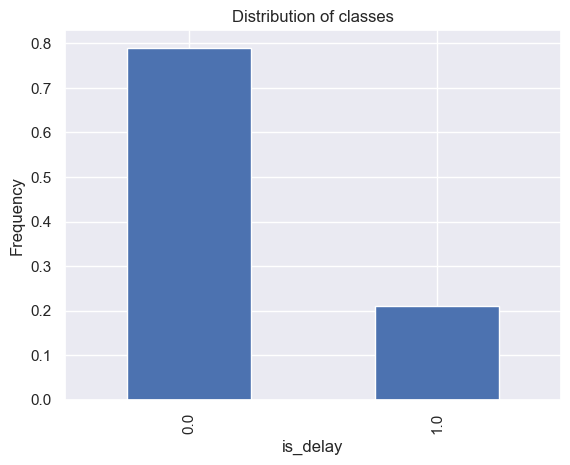

In [33]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

Looking at the bar plot above and the value counts percentages, it can be seen that approximately 21% of flights have a delay of 15 minutes or longer.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

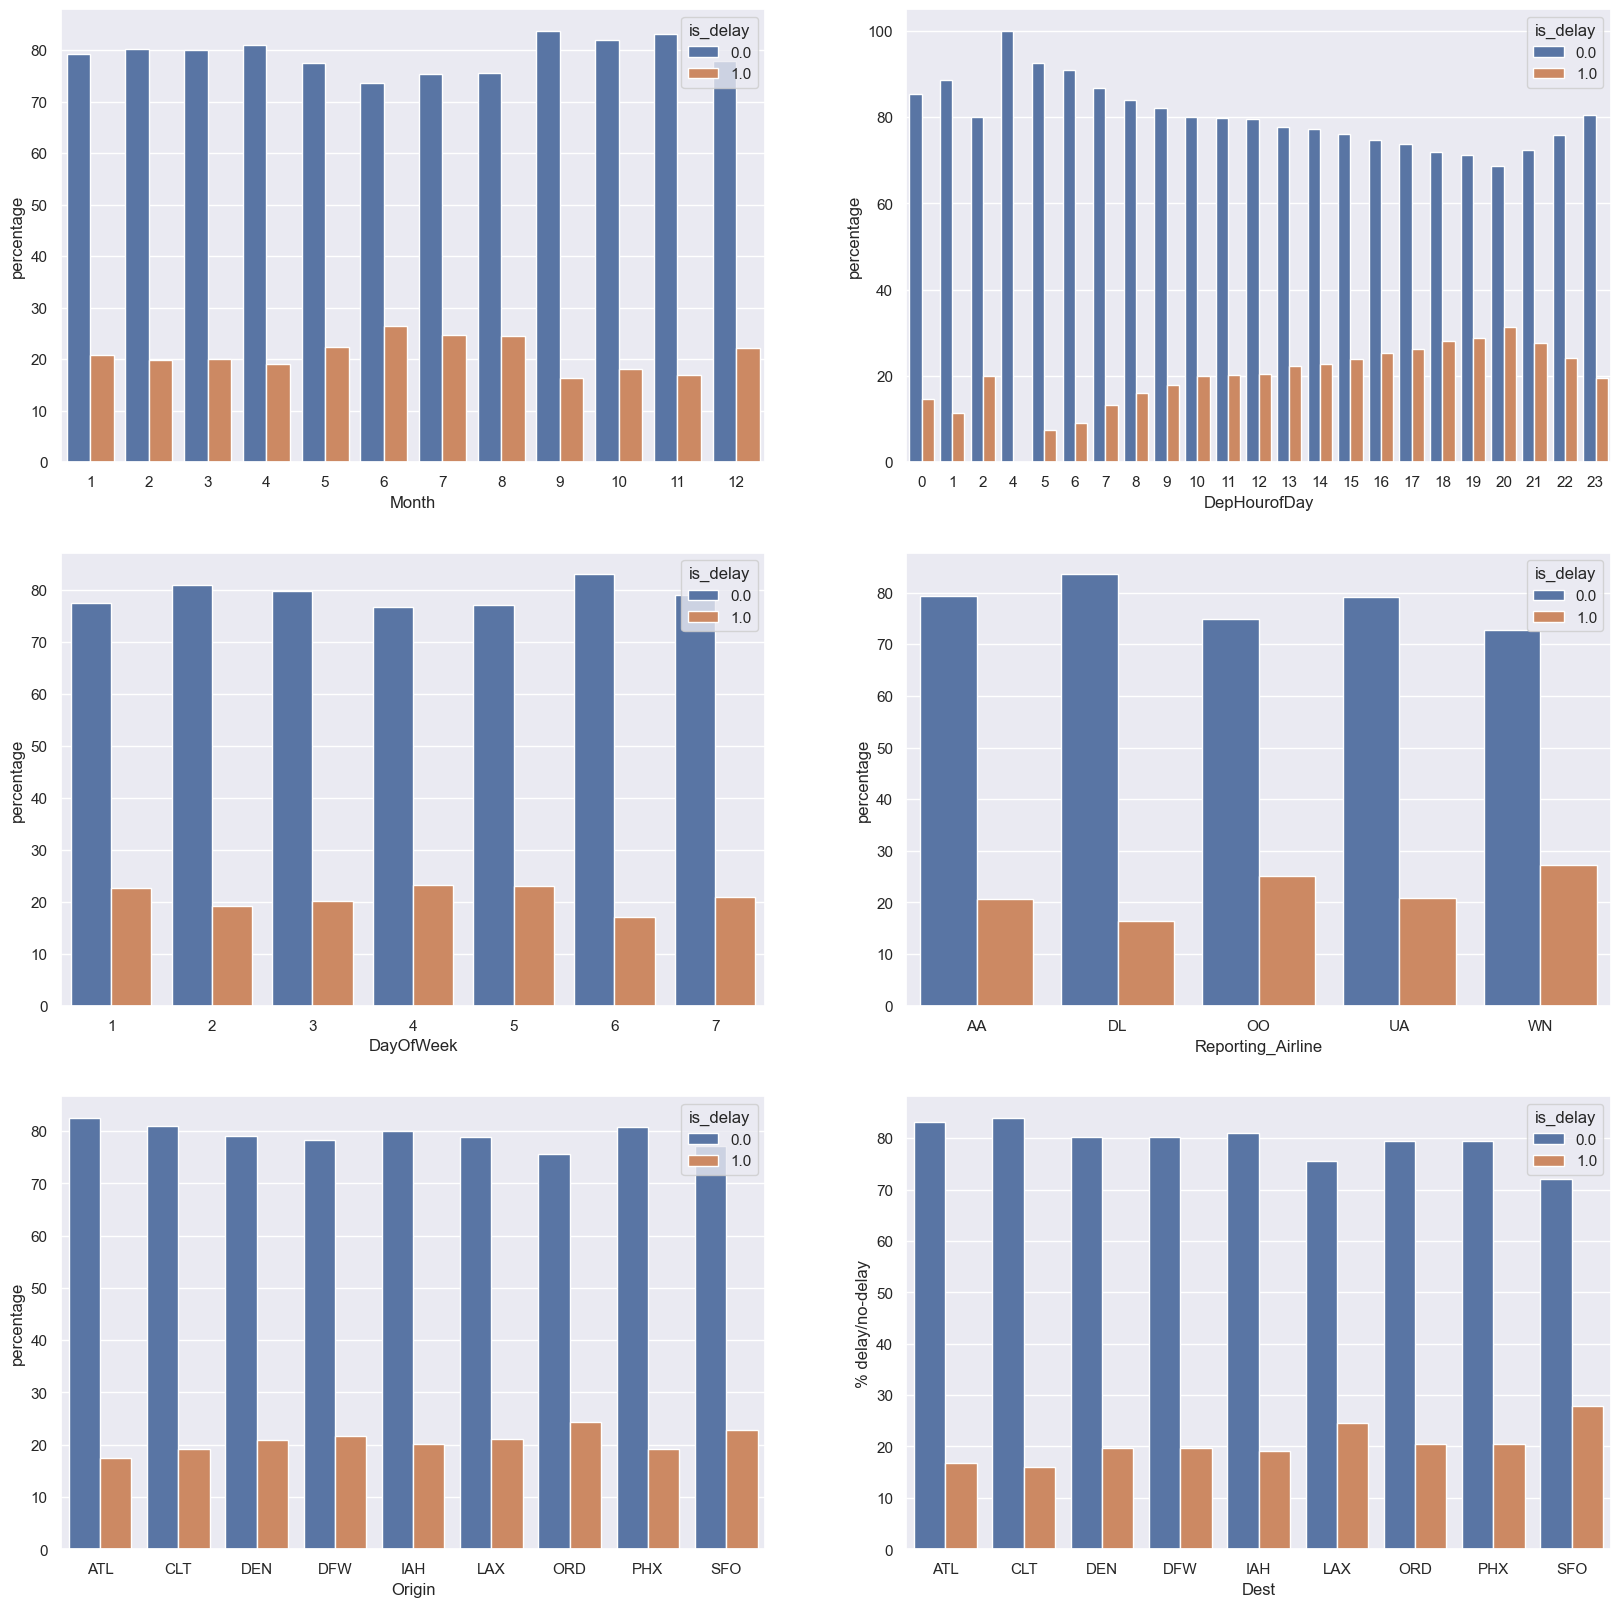

In [34]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

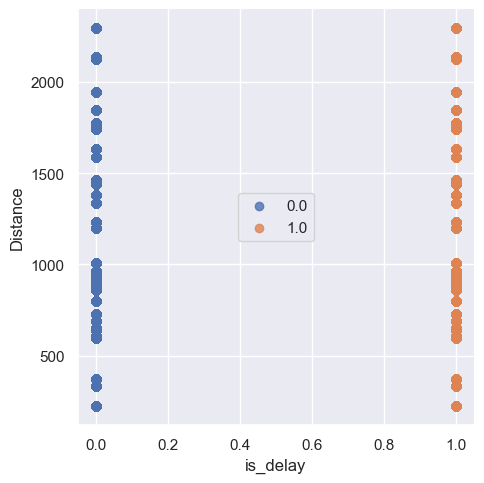

In [35]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

1. Which months have the most delays?  
Looking at the first plot, the summer months of June, July and August have the highest percentage of delays. December is fourth.

2. What time of the day has the most delays?  
Hour 20 or 8PM has the highest percentage of delays. The hours on either side of 8PM are next and they taper off smoothly.


3. What day of the week has the most delays?  
I have confirmed that day 1 is Monday. Looking at the bar plot, it appears that day 4 or Thursday has the highest percentage of delays. Closely followed by Friday and Monday.

4. Which airline has the most delays?  
Airline with the IATA code of WN has the most delays. This is Southwest Airlines. Followed by OO which is Sky West.

5. Which origin and destination airports have the most delays?  
The airport with the highest percentage of origin delays is ORD, Chicago O'Hare, followed by SFO, San Francisco.  
The airport with the highest percentage of destination delays is SFO, San Francisco, followed by ORD, Chicago O'Hare.

6. Is flight distance a factor in the delays?  
The distribution of 'is delay' to distance appears very uniform, regardless if the flight has been delayed or not. This indicates that distance is not a factor in whether a flight is delayed or not. 

### Features

Look at all the columns and what their specific types are.

In [36]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [37]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [38]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [39]:
# Apply one-hot encoding to all the variables in the 'categorical_columns' list
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=False)

# Concatenate the dataframe with the df of additional one-hot dummies
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns 
data.drop(categorical_columns, axis=1, inplace=True)

Check the length of the dataset and the new columns.

In [40]:
print('After one-hot encoding was applied')

# The number of rows should be the same
print(f'Number of rows in the dataframe: {data.shape[0]}')

# The number of columns should have increased significantly
print(f'Number of columns in the dataframe: {data.shape[1]}')

After one-hot encoding was applied
Number of rows in the dataframe: 1635590
Number of columns in the dataframe: 102


In [41]:
data.head()

,is_delay,Distance,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofMonth_1,DayofMonth_2,DayofMonth_3,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_30,DayofMonth_31,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Reporting_Airline_AA,Reporting_Airline_DL,Reporting_Airline_OO,Reporting_Airline_UA,Reporting_Airline_WN,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_IAH,Origin_LAX,Origin_ORD,Origin_PHX,Origin_SFO,Dest_ATL,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourofDay_0,DepHourofDay_1,DepHourofDay_2,DepHourofDay_4,DepHourofDay_5,DepHourofDay_6,DepHourofDay_7,DepHourofDay_8,DepHourofDay_9,DepHourofDay_10,DepHourofDay_11,DepHourofDay_12,DepHourofDay_13,DepHourofDay_14,DepHourofDay_15,DepHourofDay_16,DepHourofDay_17,DepHourofDay_18,DepHourofDay_19,DepHourofDay_20,DepHourofDay_21,DepHourofDay_22,DepHourofDay_23
0,0.0,689.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.0,731.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,1199.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,1587.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.0,1587.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
print("Column names in the new dataframe:")
print(data.columns.tolist())

Column names in the new dataframe:
['is_delay', 'Distance', 'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_1', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_AA', 'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN', 'Origin_AT

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [43]:
data.rename(columns = {'is_delay': 'target'}, inplace=True)

In [44]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

file_name = 'combined_csv_v1.csv'

# Save the combined dataframe to a new CSV file
data.to_csv(file_name, index=False)
print(f"The combined dataframe has been saved in the working directory as: {file_name}")

The combined dataframe has been saved in the working directory as: combined_csv_v1.csv


In [45]:
data.describe()

,target,Distance,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofMonth_1,DayofMonth_2,DayofMonth_3,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_30,DayofMonth_31,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Reporting_Airline_AA,Reporting_Airline_DL,Reporting_Airline_OO,Reporting_Airline_UA,Reporting_Airline_WN,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_IAH,Origin_LAX,Origin_ORD,Origin_PHX,Origin_SFO,Dest_ATL,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourofDay_0,DepHourofDay_1,DepHourofDay_2,DepHourofDay_4,DepHourofDay_5,DepHourofDay_6,DepHourofDay_7,DepHourofDay_8,DepHourofDay_9,DepHourofDay_10,DepHourofDay_11,DepHourofDay_12,DepHourofDay_13,DepHourofDay_14,DepHourofDay_15,DepHourofDay_16,DepHourofDay_17,DepHourofDay_18,DepHourofDay_19,DepHourofDay_20,DepHourofDay_21,DepHourofDay_22,DepHourofDay_23
count,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06,1.635590e+06
mean,2.099132e-01,1.011397e+03,2.318613e-01,2.486222e-01,2.634224e-01,2.560941e-01,7.768389e-02,7.118654e-02,8.299085e-02,8.034104e-02,8.423199e-02,8.404918e-02,9.011794e-02,8.982875e-02,8.347569e-02,8.812722e-02,8.349220e-02,8.447472e-02,3.240910e-02,3.287988e-02,3.236630e-02,3.209973e-02,3.275882e-02,3.275210e-02,3.280101e-02,3.274170e-02,3.295936e-02,3.295202e-02,3.297648e-02,3.310976e-02,3.311160e-02,3.293857e-02,3.300032e-02,3.324855e-02,3.303089e-02,3.318374e-02,3.335860e-02,3.331947e-02,3.310793e-02,3.290678e-02,3.269768e-02,3.215415e-02,3.261759e-02,3.321126e-02,3.277900e-02,3.265427e-02,3.099249e-02,3.043061e-02,1.845022e-02,1.486406e-01,1.445063e-01,1.468877e-01,1.488221e-01,1.494390e-01,1.211294e-01,1.405750e-01,3.627816e-01,1.651685e-01,5.979432e-02,3.013237e-01,1.109318e-01,1.161459e-01,6.236098e-02,1.142817e-01,1.239204e-01,8.081304e-02,1.490459e-01,1.308103e-01,9.926265e-02,1.233592e-01,1.167206e-01,6.245330e-02,1.128736e-01,1.231549e-01,8.048839e-02,1.497001e-01,1.320759e-01,9.921802e-02,1.233151e-01,9.924859e-03,3.085737e-03,9.782403e-05,1.406220e-05,2.704468e-02,5.593884e-02,6.971613e-02,6.832764e-02,6.165298e-02,6.518321e-02,6.063378e-02,6.371523e-02,6.220385e-02,6.304208e-02,5.888884e-02,5.905698e-02,6.325485e-02,5.097732e-02,5.223130e-02,3.870408e-02,2.532236e-02,2.934660e-02,1.163678e-02
std,4.072466e-01,5.381231e+0

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [46]:
from sklearn.model_selection import train_test_split

# Separate the target variable and the input features
X = data.drop('target', axis=1)
y = data['target']

# Split into training and test sets. 
# Stratify is enabled to ensure an even distribution of target classes in both sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=data['target'])

### Baseline classification model

In [47]:
# Build a logistic regression model

# Import the LR library
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression()

In [48]:
# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

In [50]:
# Display a sample of the predictions output
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
# Make probability predictions on the test set
y_pred_prob = lr_model.predict_proba(X_test)[::,1]

In [52]:
# Display a sample of the probability predictions output
y_pred_prob[:10]

array([0.13340181, 0.26640736, 0.22070377, 0.09650318, 0.28661514,
       0.26263178, 0.19254861, 0.27386532, 0.17476893, 0.21732343])

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Precision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(test_labels, target_predicted, class_labels):
    cm1 = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(3.5,3.5))
    sns.heatmap(cm1, annot=True, fmt='g', cbar=False,
    xticklabels=class_labels,
    yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for LogReg Model')
    plt.show()

In [54]:
# Import the necessary libraries
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

def plot_roc(test_labels, target_predicted):
    # Determine the false positive rate, true positive rate and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    
    # Calculate the area under the curve
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    # Plot the ROC
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve, AUC = {round(roc_auc,2)}')
    # Plot the line of no discrimination (45 degree angle)
    plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    
    
    # Calcualte true/false positves/negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    # Calculate the specificity
    specificity = tn / (tn + fp)
    
    # Print the evaluation metrics
    print()
    print()
    print('Evaluation Metrics')
    print('------------------')
    print('Accuracy: {:.5f}'.format(accuracy_score(test_labels, target_predicted)))
    print('Precision: {:.5f}'.format(precision_score(test_labels, target_predicted)))
    print('Recall (Sensitivity): {:.5f}'.format(recall_score(test_labels, target_predicted)))
    print(f'Specificity: {specificity:.5f}')
    print('F1-score: {:.5f}'.format(f1_score(test_labels, target_predicted)))
    

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

In [55]:
# Define the class labels
class_labels = ['No Delay', 'Delay']

**Test Set**

In [56]:
len(y_test), len(y_pred)

(327118, 327118)

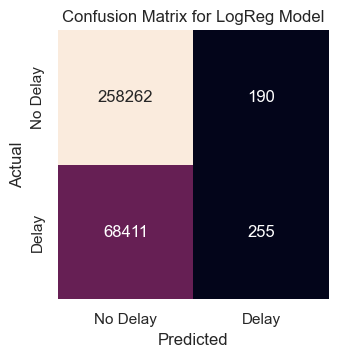

In [57]:
# Plot the confusion matrix on the test set
plot_confusion_matrix(y_test, y_pred, class_labels)

This model appears to be predicting most flights as 'no delay' and very few as a 'delay'. This is confirmed by the low number of True Positives (only 255) compared to False Negative (68411). The model  is very heavily biased towards predicting the 'no delay' class. The percentage of 'delay' is 21% so this model is predicting far less than the actual percentage.

In [58]:
y_test.value_counts(1)

0.0    0.790088
1.0    0.209912
Name: target, dtype: float64

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

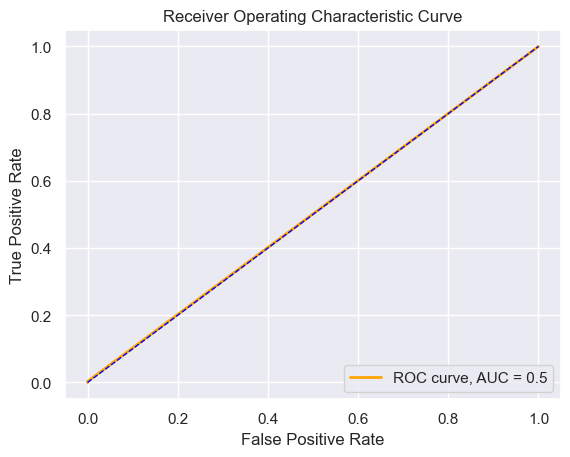



Evaluation Metrics
------------------
Accuracy: 0.79029
Precision: 0.57303
Recall (Sensitivity): 0.00371
Specificity: 0.99926
F1-score: 0.00738


In [59]:
# Plot othe ROC on the test set
plot_roc(y_test, y_pred)

In [60]:
# Print the classification report
print("Classification Report")
print("---------------------")
print(classification_report(y_test, y_pred))

Classification Report
---------------------
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258452
         1.0       0.57      0.00      0.01     68666

    accuracy                           0.79    327118
   macro avg       0.68      0.50      0.45    327118
weighted avg       0.74      0.79      0.70    327118



The output of this plot and results is discussed below.

**Train Set**  
A question below asks to compare the model's results on the test and training set. I shall also check the metrics when predicting on the training set.

In [61]:
# Make predictions on the training set
y_pred_train = lr_model.predict(X_train)

In [62]:
# Make probability predictions on the trraining set
y_pred__train_prob = lr_model.predict_proba(X_test)[::,1]

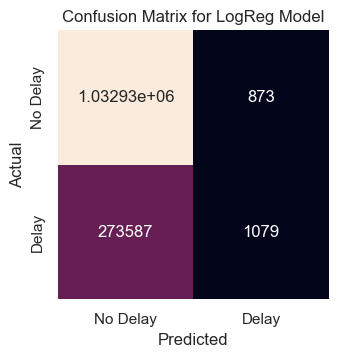

In [63]:
# Plot the confusion matrix on the training set
plot_confusion_matrix(y_train, y_pred_train, class_labels)

The training set is 4 times larger than the test set. The ratios of predicting true positives, true negatives, false postives and false negatives are about the same. This model is not predicting the "delay' class well.

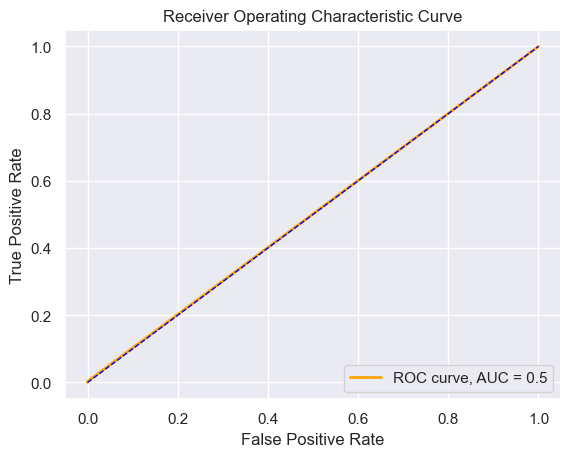



Evaluation Metrics
------------------
Accuracy: 0.79024
Precision: 0.55277
Recall (Sensitivity): 0.00393
Specificity: 0.99926
F1-score: 0.00780


In [64]:
# Plot othe ROC on the train set
plot_roc(y_train, y_pred_train)

In [65]:
# Print the classification report
print("Classification Report")
print("---------------------")
print(classification_report(y_train, y_pred_train))

Classification Report
---------------------
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88   1033806
         1.0       0.55      0.00      0.01    274666

    accuracy                           0.79   1308472
   macro avg       0.67      0.50      0.45   1308472
weighted avg       0.74      0.79      0.70   1308472



### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.

**Answers to the questions to consider**  

**1.** The results on the training and test sets are very similar. The overall accuracy for both are around 79%, which by no coincidence happens to be the percentage of values of the majority class. The model tends to predict the vast majority of flights as the majority class of 'no delay'. This is not accurate and the model and dataset need to be investigated. The precision, recall and F1-score are very similar for both the training and test set. The similarity between the two indicates that the model is not overfitting and the dataset was fairly distributed in the train test split.

The ROC (Receiver Operation Characteristic) curve is just a diagonal line, indicating the model is not detecting with any accuracy to 'Delay' class. Ideally this should have a sharp vertical rise and level off near a True Positive Rate of 1.

The poor precision, recall and F1-score confirm the poor model performance.

**2.** Similar to what is mentioned above, the accuracy on the training and test set matches the percentage of values in the majority class. This needs to be addressed to improve the model's performance.  

The precision is underperforming. When predicting a delay, it is only accurate 57.3% of the time. The recall is far worse with only 0.37% of delays are predicted accurately on the test set. This is not a good model. The F1-score is a balance between precision and recall and it too is very low, which confirms that the model's performance is poor. 

**3.** From a business standpoint, the outcome is far from sufficient. The recall (the ability to predict flight delays) is extremely poor at 0.37%. This would be unacceptable as a commercial model.  

There are many things that could be done in the feature engineering section to improve the model's performance, including, using all the available data in the dataset instead of just the top 15 airports and largest airline companies. 


**Question**: What can you summarize from the confusion matrix?


The confusion matrices for the training and test sets had very similar results. I shall summarize the numbers talking about the test set. 

Ideally the confusion matrix should have all predictions on the diagonal from the top left to the bottom right, indicating that the actual and predicted labels are the same. In this case they are not close to that. This model appears to be predicting most flights as 'no delay' and very few as a 'delay'.  

This is confirmed by the low number of True Positives (only 226) compared to False Negative (68440). The model is very heavily biased towards predicting the 'no delay' class. The percentage of 'delay' is 21%, so this model is predicting far less than the actual percentage. Clearly, this model is not performing well, and the data preparation and dataset needs to be investigated further. Feature engineering may be able to improve this model's performance.  

The model is good at predicting true negatives (258260) No Delay is the majority class. The model seems to be heavily biased towards it, again confirming that the minority class has been underpredicted. The number of false positives (192) is extremely low. It is good that this number is low, however this is another indicator that the model is not predicting many delays, even though they are 21% of the values.  

Additionally, the metrics have been described above. The ROC curve (Receiver Operating Characteristic), should ideally rise sharply and flatten off at the top with a true positive rate of 1. It is however a diagonal line with an AUC (Area Under Curve) of 0.5, which is the worst possible results. This indicates that the classififer is not predicting the outcome of the delay well at all and further work needs to be done to improve this model. 

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


### Provide a link for your Gitlab repository here

https://github.com/AlanG0000/DSTS_Assignment_2

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [67]:
# View the column types as a recap
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635590 entries, 0 to 1658129
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1635590 non-null  int64  
 1   Quarter            1635590 non-null  int64  
 2   Month              1635590 non-null  int64  
 3   DayofMonth         1635590 non-null  int64  
 4   DayOfWeek          1635590 non-null  int64  
 5   FlightDate         1635590 non-null  object 
 6   Reporting_Airline  1635590 non-null  object 
 7   Origin             1635590 non-null  object 
 8   OriginState        1635590 non-null  object 
 9   Dest               1635590 non-null  object 
 10  DestState          1635590 non-null  object 
 11  CRSDepTime         1635590 non-null  int64  
 12  Cancelled          1635590 non-null  float64
 13  Diverted           1635590 non-null  float64
 14  Distance           1635590 non-null  float64
 15  DistanceGroup      1635590 non-n

In [68]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14 + holidays_15 + holidays_16 + holidays_17 + holidays_18

### Add indicator variable for holidays
# If the 'FlightDate' is in the holiday list, then make it a 1, else 0
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

In [69]:
### View the header of 'data_orig' as a recap and to confirm
data_orig.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay,is_holiday
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,21,0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,9,0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,18,0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,16,0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,7,0


In [70]:
data_orig['is_holiday'].value_counts()

0    1591678
1      43912
Name: is_holiday, dtype: int64

Several values have been assigned a 1, but most are 0, as is expected

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [71]:
# download data from the link above and place it into the data folder

# The file was downloaded and added into the working directory.
# It has been renamed to daily-summaries.csv

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [72]:
weather = pd.read_csv('daily-summaries.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

In [73]:
# View the header of the weather dataframe
weather.head(2)

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0


In [74]:
### Map weather stations to airport code
# Make a 'station_map' empty dictionary
station_map = {}
# Iterate through all the stations and map them to the corresponding airport
for idx in range(len(station)):
    station_map[station[idx]] = airports[idx]

# Create a new feature in the 'weather' df that maps
# the weather station to the airport code
weather['airport'] = weather['STATION'].map(station_map)

In [75]:
# View the header of the weather dataframe to confirm
weather.head(2)

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX


Create another column called `MONTH` from the `DATE` column.

In [76]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

In [77]:
# Check the shape and the number of missing values
print(weather.shape)
print()
print(weather.isna().sum())

(16434, 11)

STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64


In [78]:
# Check the value counts of 'SNOW'
weather['SNOW'].value_counts()

0.0      10647
3.0         36
5.0         30
8.0         17
10.0        17
25.0        17
15.0        14
18.0        14
13.0        11
20.0        11
43.0        10
58.0         9
56.0         8
23.0         6
51.0         6
36.0         6
33.0         6
38.0         5
28.0         5
46.0         5
97.0         4
30.0         4
76.0         4
41.0         4
86.0         4
71.0         3
94.0         3
64.0         3
69.0         3
61.0         3
66.0         3
81.0         2
48.0         2
79.0         2
99.0         2
130.0        2
74.0         2
145.0        2
53.0         2
107.0        2
127.0        1
137.0        1
411.0        1
178.0        1
163.0        1
157.0        1
84.0         1
142.0        1
147.0        1
221.0        1
89.0         1
152.0        1
91.0         1
104.0        1
300.0        1
333.0        1
119.0        1
175.0        1
196.0        1
117.0        1
Name: SNOW, dtype: int64

This shows a quantity, I am not sure of the units, however, 0 is by far the most common value, meaning no snow. The missing values shall be imputed with 0.

In [79]:
# Check the value counts of 'SNWD'
weather['SNWD'].value_counts()

0.0      10547
30.0       127
50.0        84
130.0       40
80.0        38
100.0       30
150.0       30
230.0       12
180.0       10
250.0        9
200.0        6
280.0        5
300.0        5
360.0        3
25.0         3
330.0        2
460.0        1
430.0        1
410.0        1
380.0        1
51.0         1
Name: SNWD, dtype: int64

Again, this shows a quantity. I am not sure of the units, however, 0 is by far the most common value, meaning no snow. The missing values shall be imputed with 0.

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [80]:
# Impute the missing values with 0
weather.SNOW.fillna(0, inplace=True)# Enter your code here
weather.SNWD.fillna(0, inplace=True)# Enter your code here
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [81]:
# Create an array of indices
idx = np.array([i for i in range(len(weather))])

# Find all indices of the missing values
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()] 

# Sample output for TAVG_idx
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [82]:
# Group by the weather station and the month (improved accuracy). 
# Then calculate the mean values for avg, min and max temperature.
# Place them into a dataframe
weather_impute = weather.groupby(['STATION', 'MONTH']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

,STATION,MONTH,TAVG,TMAX,TMIN
0,USW00003017,01,-2.741935,74.000000,-69.858065
1,USW00003017,02,11.219858,88.553191,-65.035461


Merge the mean data with the weather data.

In [83]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [84]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [85]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [86]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [87]:
sum(data.isna().any())

0

In [88]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [89]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]

### Note! I added 'DepHourofDay' which has slightly improved precision, recall and F1-Score
categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday', 'DepHourofDay']  
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [90]:
# Apply one-hot encoding to all the variables in the 'categorical_columns' list
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=False)

# Concatenate the dataframe with the df of additional one-hot dummies
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns 
data.drop(categorical_columns, axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

Note, I included DepHourofDay as it slightly improved the results.  

For one-hot encoding, I set drop_first=False not True because it improved the results slightly, but more importantly, when making histograms in Tableau, all of the values were there. i.e. All 7 days of the week could be included, not 6.

In [91]:
# Display all the columns
print(list(data.columns))

['is_delay', 'Distance', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_1', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_A

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [92]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [93]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

file_name = 'combined_csv_v2.csv'

# Save the combined dataframe to a new CSV file
data.to_csv(file_name, index=False)
print(f"The combined dataframe has been saved in the working directory as: {file_name}")

The combined dataframe has been saved in the working directory as: combined_csv_v2.csv


Create the training and testing sets again.

In [94]:
# Separate the target variable and the input features
X = data.drop('target', axis=1)
y = data['target']

# Split into training and test sets. 
# Stratify is enabled to ensure an even distribution of target classes in both sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=data['target'])

In [95]:
# View the header
X_train.head()

,Distance,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,SNOW_D,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofMonth_1,DayofMonth_2,DayofMonth_3,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_30,DayofMonth_31,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Reporting_Airline_AA,Reporting_Airline_DL,Reporting_Airline_OO,Reporting_Airline_UA,Reporting_Airline_WN,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_IAH,Origin_LAX,Origin_ORD,Origin_PHX,Origin_SFO,Dest_ATL,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,is_holiday_0,is_holiday_1,DepHourofDay_0,DepHourofDay_1,DepHourofDay_2,DepHourofDay_4,DepHourofDay_5,DepHourofDay_6,DepHourofDay_7,DepHourofDay_8,DepHourofDay_9,DepHourofDay_10,DepHourofDay_11,DepHourofDay_12,DepHourofDay_13,DepHourofDay_14,DepHourofDay_15,DepHourofDay_16,DepHourofDay_17,DepHourofDay_18,DepHourofDay_19,DepHourofDay_20,DepHourofDay_21,DepHourofDay_22,DepHourofDay_23
1593699,1440.0,25,0,349.0,35,0,211.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
556328,599.0,25,18,264.0,32,0,229.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
54227,606.0,40,0,51.0,24,0,118.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
602561,1773.0,19,0,94.0,24,8,61.0,0.0,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
950796,1337.0,29,0,266.0,52,0,234.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [96]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression()

In [97]:
# Train the model
classifier2.fit(X_train, y_train)

LogisticRegression()

In [98]:
# Make predictions on the test set
y_pred = classifier2.predict(X_test)

In [99]:
# Display a sample of the predictions output
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
# Make probability predictions on the test set
y_pred_prob = classifier2.predict_proba(X_test)[::,1]

In [101]:
# Display a sample of the probability predictions output
y_pred_prob[:10]

array([0.20245541, 0.19790082, 0.17046101, 0.23959552, 0.22884725,
       0.23567993, 0.1444651 , 0.14984125, 0.16509286, 0.32181021])

#### Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Precision, Recall, Sensitivity and Specificity

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

**Test Set**

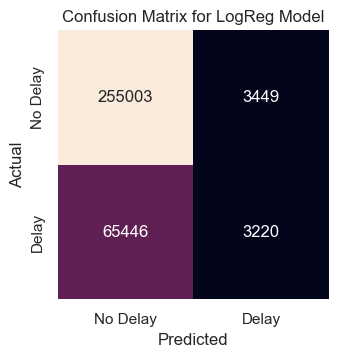

In [102]:
# Plot the confusion matrix on the test set
plot_confusion_matrix(y_test, y_pred, class_labels)

This model is definitely much better than model 1, but it still appears to be predicting most flights as 'no delay' and very few as a 'delay'. This is confirmed by the low number of True Positives of 3220 (up significantly from 255) compared to False Negative (65446). The model  is very heavily biased towards predicting the 'no delay' class. The percentage of 'delay' is 21% so this model is predicting far less than the actual percentage.

In [103]:
# Distribution of classes by percentage
y_test.value_counts(1)

0.0    0.790088
1.0    0.209912
Name: target, dtype: float64

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

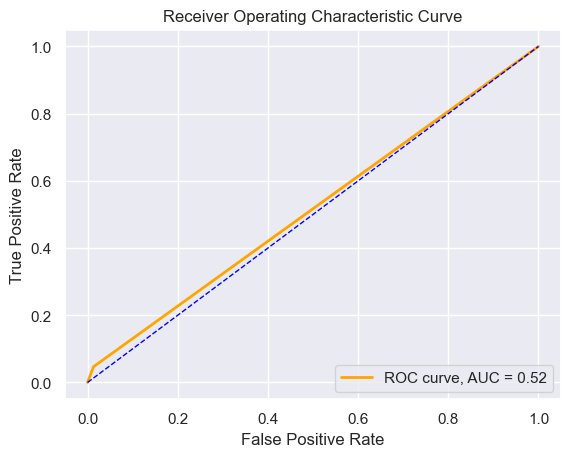



Evaluation Metrics
------------------
Accuracy: 0.78939
Precision: 0.48283
Recall (Sensitivity): 0.04689
Specificity: 0.98666
F1-score: 0.08548


In [104]:
# Plot othe ROC on the test set
plot_roc(y_test, y_pred)

In [105]:
# Print the classification report
print("Classification Report")
print("---------------------")
print(classification_report(y_test, y_pred))

Classification Report
---------------------
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    258452
         1.0       0.48      0.05      0.09     68666

    accuracy                           0.79    327118
   macro avg       0.64      0.52      0.48    327118
weighted avg       0.73      0.79      0.71    327118



The output of this plot and results is discussed below.

**Train Set**  
I shall be consistent with model 1 and also check the metrics when predicting on the training set.

In [106]:
# Make predictions on the training set
y_pred_train = classifier2.predict(X_train)

In [107]:
# Make probability predictions on the trraining set
y_pred__train_prob = classifier2.predict_proba(X_test)[::,1]

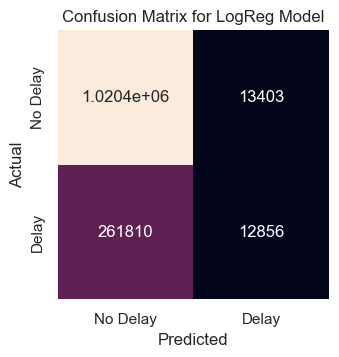

In [108]:
# Plot the confusion matrix on the training set
plot_confusion_matrix(y_train, y_pred_train, class_labels)

The training set is 4 times larger than the test set. The ratios of predicting true negatives, false postives and false negatives are about the same. Predicting True postives has increased on the train set. This indicates possible overfitting.

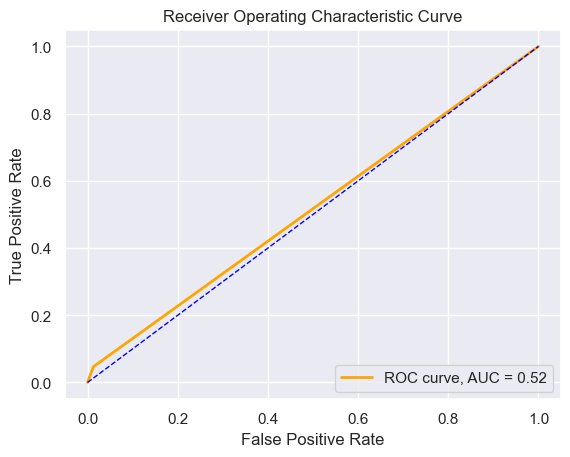



Evaluation Metrics
------------------
Accuracy: 0.78967
Precision: 0.48958
Recall (Sensitivity): 0.04681
Specificity: 0.98666
F1-score: 0.08544


In [109]:
# Plot othe ROC on the train set
plot_roc(y_train, y_pred_train)

In [110]:
# Print the classification report
print("Classification Report")
print("---------------------")
print(classification_report(y_train, y_pred_train))

Classification Report
---------------------
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88   1033806
         1.0       0.49      0.05      0.09    274666

    accuracy                           0.79   1308472
   macro avg       0.64      0.52      0.48   1308472
weighted avg       0.73      0.79      0.71   1308472



## Random Forest

### New baseline classifier

This is not part of the assessable content, but I was curious to see if another model would work better.

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a random forest classifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=12)

In [112]:
# Train the model
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

In [113]:
# Make predictions on the test set
y_pred = rf1.predict(X_test)

In [114]:
# Display a sample of the predictions output
y_pred[:10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [115]:
# Make probability predictions on the test set
y_pred_prob = rf1.predict_proba(X_test)[::,1]

In [116]:
# Display a sample of the probability predictions output
y_pred_prob[:10]

array([0.02, 0.27, 0.06, 0.29, 0.54, 0.28, 0.06, 0.39, 0.09, 0.07])

**Perform the evaluation as you have done with the previous model and plot/show the same metrics**

**Test Set**

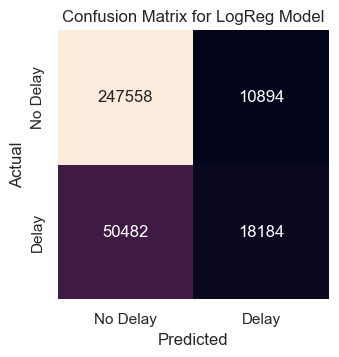

In [117]:
# Plot the confusion matrix on the test set
plot_confusion_matrix(y_test, y_pred, class_labels)

This RF model appears to still be predicting most flights as 'no delay' but there are far more predicted as 'delay' than from model 2. This is confirmed by the increased number of True Positives, 18184, much more than 3220. It is a big improvement.

In [118]:
y_test.value_counts(1)

0.0    0.790088
1.0    0.209912
Name: target, dtype: float64

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

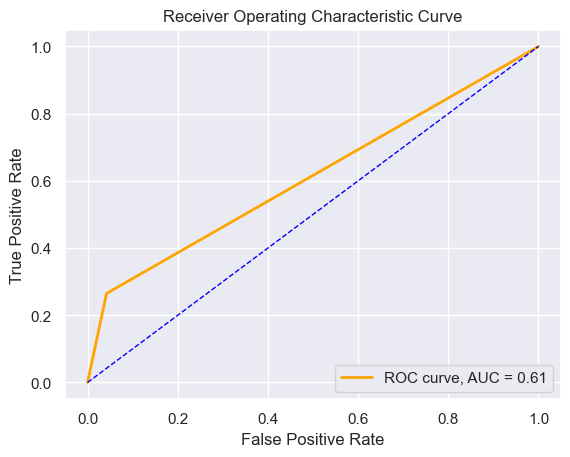



Evaluation Metrics
------------------
Accuracy: 0.81237
Precision: 0.62535
Recall (Sensitivity): 0.26482
Specificity: 0.95785
F1-score: 0.37207


In [119]:
# Plot othe ROC on the test set
plot_roc(y_test, y_pred)

In [120]:
# Print the classification report
print("Classification Report")
print("---------------------")
print(classification_report(y_test, y_pred))

Classification Report
---------------------
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89    258452
         1.0       0.63      0.26      0.37     68666

    accuracy                           0.81    327118
   macro avg       0.73      0.61      0.63    327118
weighted avg       0.79      0.81      0.78    327118



Although still bad, the recall has gone up significantly on the test set from 0.37% to 26.48%. The AUC is not 0.61, an improvement from 0.52.  

Overall accuracy has climbed to 81.2%, up from 79.0% for the logistic regressor. It seems like the Random Forest is performing better on this dataset.

**Train Set**  
I shall be consistent with model 1 and the logistic regressor and also check the metrics when predicting on the training set.

In [121]:
# Make predictions on the training set
y_pred_train = rf1.predict(X_train)

In [122]:
# Make probability predictions on the trraining set
y_pred__train_prob = rf1.predict_proba(X_test)[::,1]

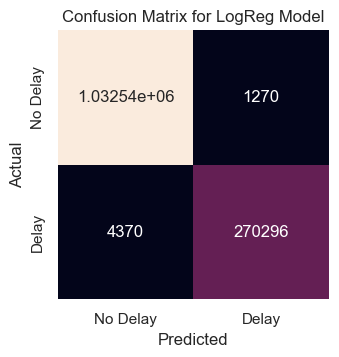

In [123]:
# Plot the confusion matrix on the training set
plot_confusion_matrix(y_train, y_pred_train, class_labels)

This seems to be predicting far too well compared to the test set. A clear sign of overfitting.

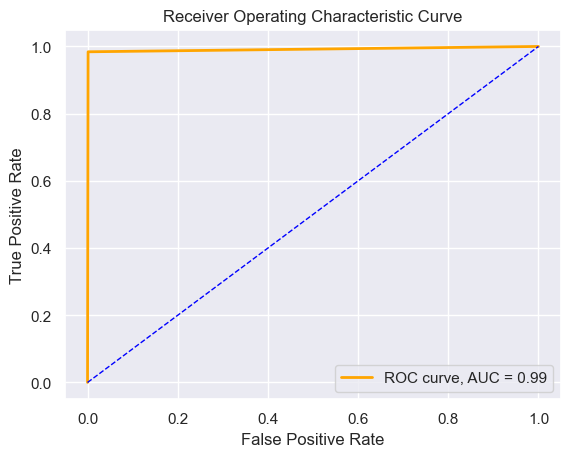



Evaluation Metrics
------------------
Accuracy: 0.99569
Precision: 0.99532
Recall (Sensitivity): 0.98409
Specificity: 0.95785
F1-score: 0.98967


In [ ]:
# Plot othe ROC on the train set
plot_roc(y_train, y_pred_train)

In [ ]:
# Print the classification report
print("Classification Report")
print("---------------------")
print(classification_report(y_train, y_pred_train))

Classification Report
---------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1033806
         1.0       1.00      0.98      0.99    274666

    accuracy                           1.00   1308472
   macro avg       1.00      0.99      0.99   1308472
weighted avg       1.00      1.00      1.00   1308472



This is interesting to see the results on the train set compared to the test. The overall accuracy on the train set and all other metrics including the AUC are excellent, but much worse on the test set. The random forest classifier has clearly over trained on the training set. In spite of this it still performs better on the independent test set than the logistic regressor. Much more work would have to be done on the RF model to reduce the overfitting, but it clearly shows a lot of potential for this dataset.

#### End Random Forest

Perform the evaluation as you have done with the previous model and plot/show the same metrics

**Question: did you notice a difference by adding the extra data on the results?**

**Answer**

There was not a lot of improvement in the overall model accuracy with the extra features included. The overall accuracy remained around 79% for both models 1 and 2 in the test set, however model 2 did significantly improve in accurately predicting delays, which increased greatly from around 255 correct to around 3220. This is reflected in the recall which rose from 0.37% to 4.69%. This is a large increase, however, it is still vastly underpredicting delays.

The AUC or area under the curve improved slightly from 0.5 to 0.52. It is still a terribly poor number but it does show that the model did improve slightly.  

Adding the weather information and holidays definitely improved the accuracy. In particular, busy holiday periods or extreme weather like heavy snowfall or rain increase the number of delays.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel highlight the main question(s) of the problem statement.

### Link to Tableau Dashboard

https://public.tableau.com/app/profile/alan.gaugler/viz/DSTS_2/Delays?publish=yes

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. This model's performance is very poor. It is predominatntely predicting the majority class which is not how a good model should perform. It certainly does not meet the business goal of accurately predicting delays. 

**Q1.** This model's performance is very poor. It is predominantly predicting the majority class which is not how a good model should perform. The majority class comprises 79% of the dataset which is very close to the model’s accuracy.  It certainly does not meet the business goal of accurately predicting delays. The recall for the class ‘Delay’ is extremely small at 0.47% on the test set. This means that the model cannot predict delays well. 

If I had more time there are several things I could have done to improve the accuracy of this model, in particular the recall of the minority class. These can be summarized as follows:

1. **More feature engineering:** There is a very large number of variables in this dataset and the most likely have very little to no correlation to flight delays, however it is worth examining them more closely in case some are important.  
2. **Standardization:** In the features actually used in the modelling, o\most were categorical and were appropriately one-hot encoded, however some were continuous variables such as distance, temperature, snow and other weather variables. They should be standardized or scaled so they all have a mean of 0 and a standard deviation of 1. This is done so that they are all treated with equal weight by the distance-based models. Distance is on a much larger scale than temperature and so more weight will be given to distance in the modelling process. Standardization will give equal weight. 
3. **SMOTE:** Or Synthetic Minority Over-sampling Technique. This is an oversampling technique to synthetically create more samples of the minority class. This will balance the class distribution so that there are an equal number of ‘Delay’ and ‘No Delay’ classes, which will cause the model to give equal priority to both classes when being fitted to the data. This will result in the model being able to predict the minority class more accurately on the test set.
4. **Principal Component Analysis:** PCA is used to reduce multicollinearity and the number of features in a dataset with many features. The new features are the strongest linear components of all of the features. This will decrease the processing time and the number of features, but ensure that the strongest components of all features are included. 
5. **Different models:** There are so many different models that could be tried, given there was enough time Common models include Support Vector Machine, Random Forest and Artificial Neural Networks among many others. 
6. **Hyperparameter tuning:** With a good choice of hyperparameters in a grid search it is always very likely that some gains will be produced in the modelling process. This is however very time consuming.

**Q2.** There was not a lot of improvement in the overall model accuracy with the extra features included. The overall accuracy remained around 79% for both models in the test set, however model 2 did significantly improve in accurately predicting delays, which increased greatly from around 255 correct to around 3220. This is reflected in the recall which rose from 0.37% to 4.69%. This is a large increase, however, it is still vastly underpredicting delays. 

Adding the weather information and holidays definitely improved the accuracy. In particular, busy holiday periods or extreme weather like heavy snowfall increase the number of delays. 

Additionally, I added the one hot encoding for the departure hour. This also notably increased the accuracy of the model. It was observed earlier that peak delays are normally at 20:00 with a gradual decline on either side. I believe that one hot encoding all these variables provided significant improvement to the model. The variable quarter is likely not required as the month variable will cover this period in more detail.

The airport variable is of course extremely important, as some airports are busier than others and the weather will vary considerably among the cities in such a large country. 

**Q3.** The biggest challenge was definitely making an accurate model with the given data. As mentioned above, the recall is extremely low and this is a very important factor of making a good model. There are many options I would have liked to have tried as mentioned in 1. 

However, another big challenge was very limited time available to me to be able to try these other techniques. Some of these techniques could be very time consuming, such as deploying different models and tuning their hyperparameters.

Another challenge was for the on cloud project. I have had very limited time to learn how to use AWS properly and setting up the models on the AWS platform is considerably different from standard Python. I do however appreciate the opportunity to having been exposed to AWS as it is very important to gain cloud experience now in data science.

**Q4.** This is similar to the previous question however:  
1.	Good data preparation is extremely important and more important than selecting the perfect model. Feature engineering and selecting the right features is very important, even though you may have to find them from various sources. The flight data, the weather and the holiday schedule all come from different sources, but together they improve the model’s accuracy.  
2.	Class Imbalance is very important to address correctly, in particular if predicting the minority class is important or critical.  
3.	Model tuning can be a lengthy process if you want to produce maximum accuracy. There are so many different techniques and models available to try and often certain techniques work better than others on certain datasets. Often there is no way of knowing which features, models or hyperparameters will work best so many combinations must be tried to find the best solution.
